In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
from scipy import stats
import seaborn as sns

In [115]:
## Useful Globals
start_Date = datetime.strptime('2011-01-29', '%Y-%M-%d').date() ## The starting point of our dates

In [116]:
salesDf = pd.read_csv("data/sales_train_evaluation.csv")

In [117]:
salesDf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


# My Understanding
## Columns
- id : a unique product id from a specific store (10 stores, 3049 products = 30490 rows)
- item_id : a product
- dept_id : department id
- cat_id : category id
- d_1 ~ d_1941 : the number of sales for day 1 through day 1941 per product

## Factors that could influence the sales
- Product Type (department, category)
- Location
- Seasonality
- - By Week
  - By Month
- Events (ie valentines, christmas, ...)
- Sales Discounts

## Plan
The plan here would be to evaluate the different factors in order to see which play a factor and to what extend in order to define what we would want our model to look like. We will start by going through the factors to identify which play a part in sales, and which do not

#### Making some helper functions

In [172]:
## Pass in a df with the columns being id, .... ,d_1~d_xx
## Returns a df with 2 columns "dates" and "sales", aggregates all the rows into 1 sales
def dateDf(df):
    nuDf = pd.DataFrame()
    nuDf['date'] = pd.date_range(start_Date ,start_Date+timedelta(days=df.shape[1]-7),freq='d').to_list()
    nuDf['sales'] = df.iloc[:, 6:].sum().to_list()
    return nuDf

## give a column value, dataframe, column, and period
## Returns a sales graph with the values matching the column value in the column in periods
def graphSales(colValue, df, col = 'id', period = 7):
    df = df[df[col] == colValue]
    df = dateDf(df)
    df['date'] = df['date'] - pd.to_timedelta(period, unit='d')
    sums = df.groupby([pd.Grouper(key='date', freq= str(period) + 'D')])['sales'].sum()
    df = pd.DataFrame()
    df['date'] = sums.index.to_list()
    df['sales'] = sums.to_list()
    return plt.plot(df["date"], df["sales"])

# Product Type Analysis

In [178]:
## We have categories of items, and within each category we have 2-3 departments
print(salesDf['dept_id'].unique())
print(salesDf['cat_id'].unique())

['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
['HOBBIES' 'HOUSEHOLD' 'FOODS']


We want to verify that groupings have similar trends
This will help us decide whether we want to build our models at the department, category, or item level
We want to make sure there is a high correlation between trend sets to make sure that it would be a good idea to use them
There are a few similarity measures we can use:
- MAPE
- Euclidean
- Dynamic Time Warping
- Pearson Correlation

#### We'll make some more helpers for this section

In [ ]:
## TO ADD : period
## try to keep number of rows under 20
#def createHeatMap(df, measure):
    

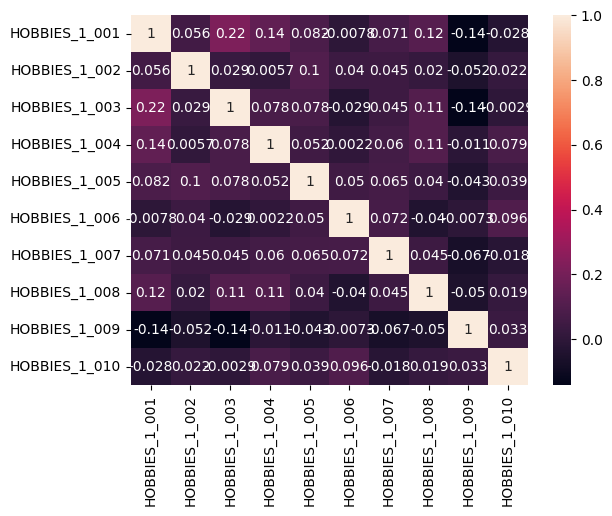

In [206]:
## I want to see if there is correlation per department based on item (reguardless of location)
currDf = salesDf[salesDf["dept_id"] == "HOBBIES_1"][:10]
salesList = {}
for item in currDf['item_id'].unique():
    salesList[item] = dateDf(currDf[currDf['item_id'] == item])['sales'].to_list()
corrDf = pd.DataFrame(salesList)
corr = corrDf.corr(method = 'kendall')
sns.heatmap(corr, annot = True)
plt.show()

In [187]:
len(salesDf[salesDf["dept_id"] == "HOBBIES_2"]['item_id'].unique())

149